<center>
    <h1> INF477 - Redes Neuronales Artificiales  </h1>
    <h2> Tarea #3 - Parte I: Entrenamiento de RNNs en una serie de tiempo </h2> 
</center>

Tarea realizada por:
* Alvaro Salinas - `alvaro.salinase@gmail.com` - **rol:** 201073001-8
* Martín Villanueva - `martin.villanueva@alumnos.usm.cl` - **rol:** 201104012-0

_DI UTFSM. Noviembre 2016._

## Tabla de Contenidos
* [Parte (a)](#a)
* [Parte (b)](#b)
* [Parte (c)](#c)
* [Parte (d)](#d)
* [Parte (e)](#e)
* [Parte (f)](#f)
* [Parte (g)](#g)
* [Parte (h)](#h1)
* [Parte (h)](#h2)
* [Parte (i)](#i)
* [Parte (j)](#j)
* [Parte (k)](#k1)
* [Parte (k)](#k2)
* [Parte (l)](#l)
* [Parte (m)](#m)

### Modulos y funciones a utilizar

In [36]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, SimpleRNN

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [80]:
def load_file(name):
    a = open('results_part1/'+name)
    t = a.readline().strip()
    trP = map(float,a.readline().strip().split())
    teP = map(float,a.readline().strip().split())
    a.close()
    trP = np.array(trP).reshape(len(trP),1)
    teP = np.array(teP).reshape(len(teP),1)
    return t,trP,teP

<div id='a'/>
## Parte (a)

Se obtienen y se escalan los datos.

In [4]:
url = 'http://www.inf.utfsm.cl/~cvalle/international-airline-passengers.csv'
dataframe = pd.read_csv(url, sep=',', usecols=[1], engine='python', skipfooter=3)
dataframe[:] = dataframe[:].astype('float32')
df_train, df_test = dataframe[0:96].values, dataframe[96:].values

scaler = MinMaxScaler(feature_range=(0, 1)).fit(df_train)
stream_train_scaled = scaler.transform(df_train)
stream_test_scaled = scaler.transform(df_test)

<div id='b'/>
## Parte (b)

Se defina la función que crea input y output de acuerdo al lag solicitado. A continuación se prueba con el ejemplo del enunciado para verificar su funcionamiento.

In [5]:
def create_dataset(dataset, lag=1):
    dataX,dataY = [],[]
    for i in range(lag,len(dataset)):
        dataY.append(dataset[i])
        x = []
        for j in range(i-lag,i):
            x.append(dataset[j])
        dataX.append(x)
    return np.array(dataX), np.array(dataY)

In [59]:
x,y = create_dataset([112, 118, 132, 129, 121, 135, 148], 3)
print "X_1 | X_2 | X_3 |  Y"
for i in range(len(y)):
    print "{0} | {1} | {2} | {3}".format(x[i][0],x[i][1],x[i][2],y[i])

X_1 | X_2 | X_3 |  Y
112 | 118 | 132 | 129
118 | 132 | 129 | 121
132 | 129 | 121 | 135
129 | 121 | 135 | 148


<div id='c'/>
## Parte (c)

Se generan los conjuntos de entrenamiento y prueba con un lag igual a 3.

In [91]:
lag = 3
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)

<div id='d'/>
## Parte (d)

Se transforma la estructura de input de acuerdo a lo necesitado por la LSTM.

In [92]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

<div id='e'/>
## Parte (e)

Se entrena una LSTM utilizando un lag de 3. Debido al tiempo que demoró su entrenamiento, se optó por realizar los siguientes en GPU. Los scripts pueden ser encontrados en la carpeta "scripts_part1" presente en este directorio. De todas formas, en cada pregunta se cita la parte esencial que fue modificada en su script correspondiente.

In [8]:
model = Sequential()
model.add(LSTM(4, input_dim=lag, activation='tanh', inner_activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

Epoch 1/100
0s - loss: 0.2100
Epoch 2/100
0s - loss: 0.0987
Epoch 3/100
0s - loss: 0.0546
Epoch 4/100
0s - loss: 0.0389
Epoch 5/100
0s - loss: 0.0322
Epoch 6/100
0s - loss: 0.0285
Epoch 7/100
0s - loss: 0.0251
Epoch 8/100
0s - loss: 0.0222
Epoch 9/100
0s - loss: 0.0198
Epoch 10/100
0s - loss: 0.0178
Epoch 11/100
0s - loss: 0.0160
Epoch 12/100
0s - loss: 0.0147
Epoch 13/100
0s - loss: 0.0137
Epoch 14/100
0s - loss: 0.0128
Epoch 15/100
0s - loss: 0.0121
Epoch 16/100
0s - loss: 0.0117
Epoch 17/100
0s - loss: 0.0112
Epoch 18/100
0s - loss: 0.0110
Epoch 19/100
0s - loss: 0.0107
Epoch 20/100
0s - loss: 0.0105
Epoch 21/100
0s - loss: 0.0103
Epoch 22/100
0s - loss: 0.0101
Epoch 23/100
0s - loss: 0.0102
Epoch 24/100
0s - loss: 0.0097
Epoch 25/100
0s - loss: 0.0095
Epoch 26/100
0s - loss: 0.0093
Epoch 27/100
0s - loss: 0.0092
Epoch 28/100
0s - loss: 0.0090
Epoch 29/100
0s - loss: 0.0089
Epoch 30/100
0s - loss: 0.0090
Epoch 31/100
0s - loss: 0.0085
Epoch 32/100
0s - loss: 0.0084
Epoch 33/100
0s -

<div id='f'/>
## Parte (f)

Se realizan las predicciones y se denormalizan los datos.

In [93]:
trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)

testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

<div id='g'/>
## Parte (g)

Se computan los RMSE de entrenamiento y prueba. Se aprecia que el error de prueba es mucho mayor.

In [163]:
lag = 3
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)
trainY = scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)

t,trP,teP = load_file('g.txt')
print 'Tiempo de Entrenamiento: '+t
trainScore = math.sqrt(mean_squared_error(trainY, trP[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, teP[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Tiempo de Entrenamiento: 50.84875464439392
Train Score: 22.78 RMSE
Test Score: 71.72 RMSE


<div id='h1'/>
## Parte (h)

A continuación se comparan gráficamente las predicciones realizadas con las series de tiempo originales.

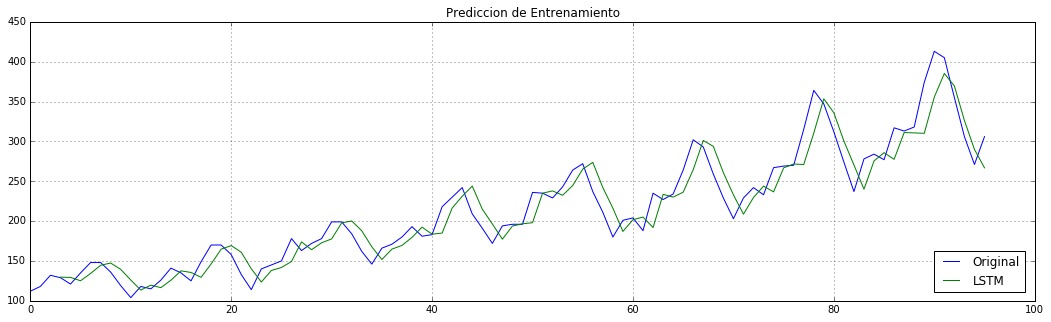

In [121]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Entrenamiento")
plt.plot(range(df_train.shape[0]),df_train[:,0],label="Original")
plt.plot(range(df_train.shape[0])[lag:],trP[:,0],label="LSTM")
plt.grid()
plt.legend(loc=(0.9,0.03))

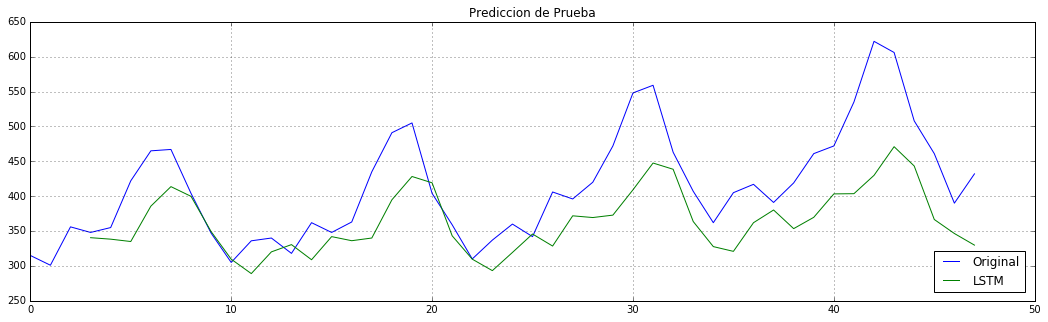

In [122]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Prueba")
plt.plot(range(df_test.shape[0]),df_test[:,0],label="Original")
plt.plot(range(df_test.shape[0])[lag:],teP[:,0],label="LSTM")
plt.grid()
plt.legend(loc=(0.9,0.03))

<div id='h2'/>
## Parte (h)

Se determina el número de bloques LSTM. Los mejores resultados fueron encontrados cuando el número de bloques fue 12, seguido por cuando fue 8, caso que también presenta buenos resultados. Es posible notar que, si bien pareciera que mientras más bloques mejor es la predicción, esto no se cumple cuando se utilizan 10 bloques pues su comportamiento es peor que al usar 8.

Finalmente, se grafican las predicciones para comparar con las series de tiempo originales. Se presentan también gráficos con "zoom" en donde solo se grafica una parte del dominio para obtener una mejor visualización.

In [ ]:
for nb in range(4,13,2):
    model = Sequential()
    model.add(LSTM(nb, input_dim=lag, activation='tanh', inner_activation='sigmoid'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=0)

In [164]:
times = []
trPs = []
tePs = []
trSs = []
teSs = []
for nb in range(4,13,2):
    t,trP,teP = load_file('h-'+str(nb)+'.txt')
    times.append(float(t))
    trPs.append(trP)
    tePs.append(teP)
    print 'Tiempo de Entrenamiento (nb='+str(nb)+'): '+t
    trainScore = math.sqrt(mean_squared_error(trainY, trP[:,0]))
    print('Train Score (nb='+str(nb)+'): %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY, teP[:,0]))
    print('Test Score (nb='+str(nb)+'): %.2f RMSE' % (testScore))
    trSs.append(trainScore)
    teSs.append(testScore)

Tiempo de Entrenamiento (nb=4): 57.47357130050659
Train Score (nb=4): 21.55 RMSE
Test Score (nb=4): 83.40 RMSE
Tiempo de Entrenamiento (nb=6): 51.57196640968323
Train Score (nb=6): 23.24 RMSE
Test Score (nb=6): 75.27 RMSE
Tiempo de Entrenamiento (nb=8): 60.604984521865845
Train Score (nb=8): 21.36 RMSE
Test Score (nb=8): 61.36 RMSE
Tiempo de Entrenamiento (nb=10): 51.90161204338074
Train Score (nb=10): 22.48 RMSE
Test Score (nb=10): 67.54 RMSE
Tiempo de Entrenamiento (nb=12): 51.31055736541748
Train Score (nb=12): 20.98 RMSE
Test Score (nb=12): 56.51 RMSE


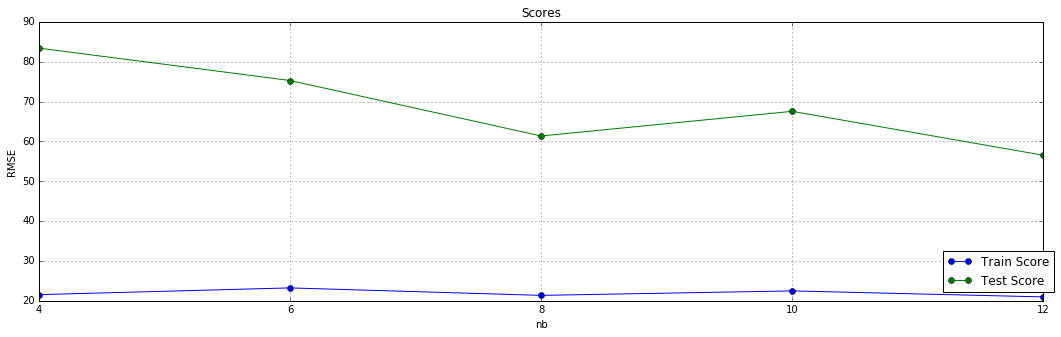

In [126]:
plt.figure(figsize=(18,5))
plt.title("Scores")
plt.plot(range(4,13,2),trSs,'o-',label="Train Score")
plt.plot(range(4,13,2),teSs,'o-',label="Test Score")
plt.xlabel("nb")
plt.ylabel("RMSE")
plt.xticks((4,6,8,10,12))
plt.grid()
plt.legend(loc=(0.9,0.03))

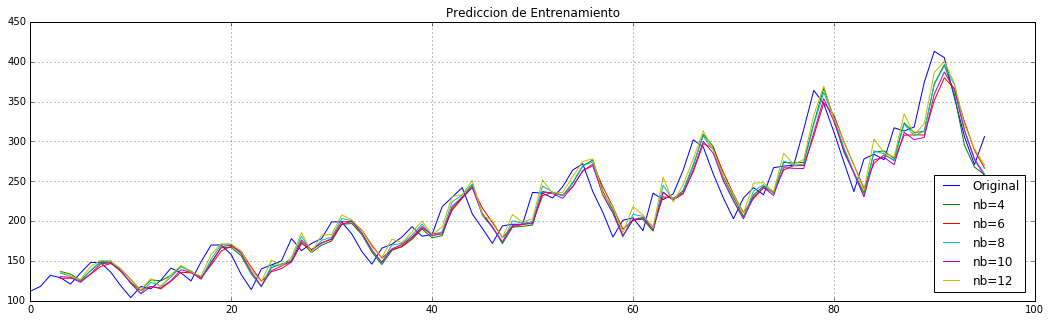

In [127]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Entrenamiento")
plt.plot(range(df_train.shape[0]),df_train[:,0],label="Original")
for i in range(5):
    plt.plot(range(df_train.shape[0])[lag:],trPs[i][:,0],label="nb="+str(4+2*i))
plt.grid()
plt.legend(loc=(0.9,0.03))

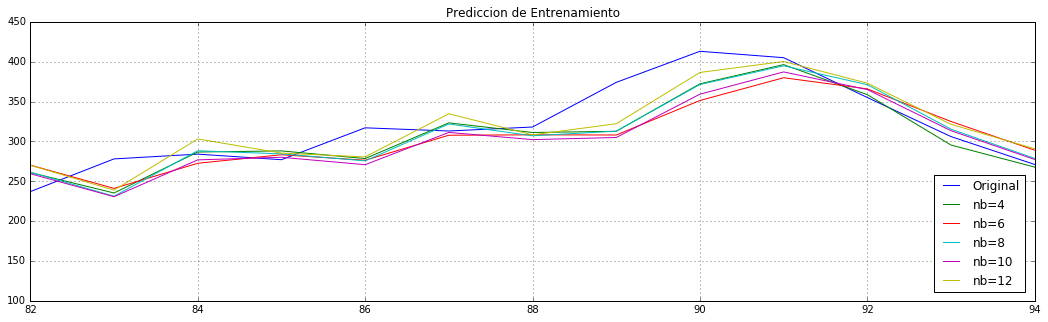

In [128]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Entrenamiento")
plt.plot(range(df_train.shape[0]),df_train[:,0],label="Original")
for i in range(5):
    plt.plot(range(df_train.shape[0])[lag:],trPs[i][:,0],label="nb="+str(4+2*i))
plt.xlim(82,94)
plt.grid()
plt.legend(loc=(0.9,0.03))

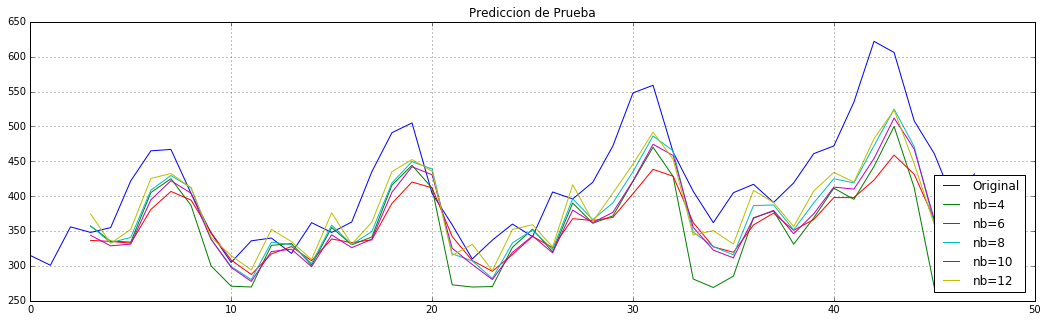

In [129]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Prueba")
plt.plot(range(df_test.shape[0]),df_test[:,0],label="Original")
for i in range(5):
    plt.plot(range(df_test.shape[0])[lag:],tePs[i][:,0],label="nb="+str(4+2*i))
plt.grid()
plt.legend(loc=(0.9,0.03))

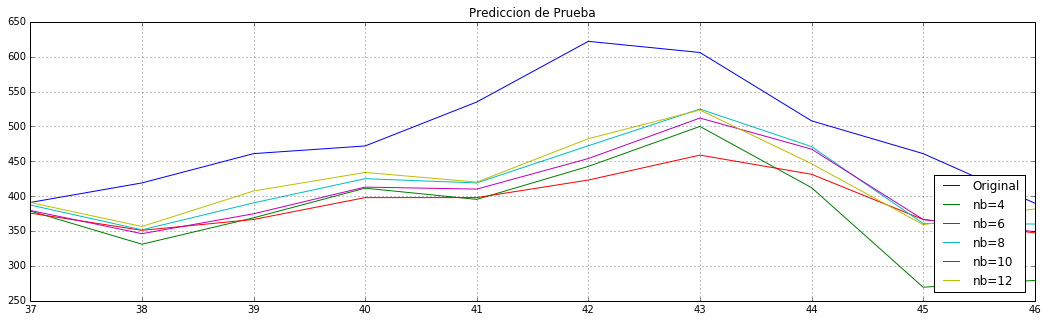

In [130]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Prueba")
plt.plot(range(df_test.shape[0]),df_test[:,0],label="Original")
for i in range(5):
    plt.plot(range(df_test.shape[0])[lag:],tePs[i][:,0],label="nb="+str(4+2*i))
plt.xlim(37,46)
plt.grid()
plt.legend(loc=(0.9,0.03))

<div id='i'/>
## Parte (i)

Se compara el desempeño de la red LSTM variando el lag utilizado entre los valores 1, 2, 3 y 4. El mejor resultado obtenido corresponde a lag = 1 y se ve que el error crece a medida que aumenta el valor de este parámetro.

Nuevamente se presentan gráficos comparativos y su correspondiente versión con "zoom".

In [ ]:
for lag in range(1,5):
    trainX, trainY = create_dataset(stream_train_scaled, lag)
    testX, testY = create_dataset(stream_test_scaled, lag)
    
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

    model = Sequential()
    model.add(LSTM(4, input_dim=lag, activation='tanh', inner_activation='sigmoid'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=0)

In [166]:
times = []
trPs = []
tePs = []
trSs = []
teSs = []
for lag in range(1,5):
    trainX, trainY = create_dataset(stream_train_scaled, lag)
    testX, testY = create_dataset(stream_test_scaled, lag)
    trainY = scaler.inverse_transform(trainY)
    testY = scaler.inverse_transform(testY)
    t,trP,teP = load_file('i-'+str(lag)+'.txt')
    times.append(float(t))
    trPs.append(trP)
    tePs.append(teP)
    print 'Tiempo de Entrenamiento (lag='+str(lag)+'): '+t
    trainScore = math.sqrt(mean_squared_error(trainY, trP[:,0]))
    print('Train Score (lag='+str(lag)+'): %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY, teP[:,0]))
    print('Test Score (lag='+str(lag)+'): %.2f RMSE' % (testScore))
    trSs.append(trainScore)
    teSs.append(testScore)

Tiempo de Entrenamiento (lag=1): 75.29849863052368
Train Score (lag=1): 22.77 RMSE
Test Score (lag=1): 58.94 RMSE
Tiempo de Entrenamiento (lag=2): 67.37728905677795
Train Score (lag=2): 22.87 RMSE
Test Score (lag=2): 70.51 RMSE
Tiempo de Entrenamiento (lag=3): 51.46645951271057
Train Score (lag=3): 21.21 RMSE
Test Score (lag=3): 74.08 RMSE
Tiempo de Entrenamiento (lag=4): 51.24196147918701
Train Score (lag=4): 24.93 RMSE
Test Score (lag=4): 89.28 RMSE


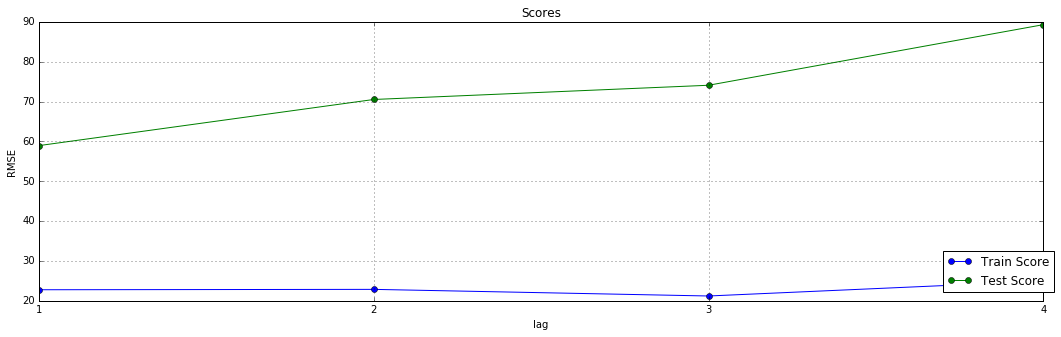

In [167]:
plt.figure(figsize=(18,5))
plt.title("Scores")
plt.plot(range(1,5),trSs,'o-',label="Train Score")
plt.plot(range(1,5),teSs,'o-',label="Test Score")
plt.xlabel("lag")
plt.ylabel("RMSE")
plt.xticks((1,2,3,4))
plt.grid()
plt.legend(loc=(0.9,0.03))

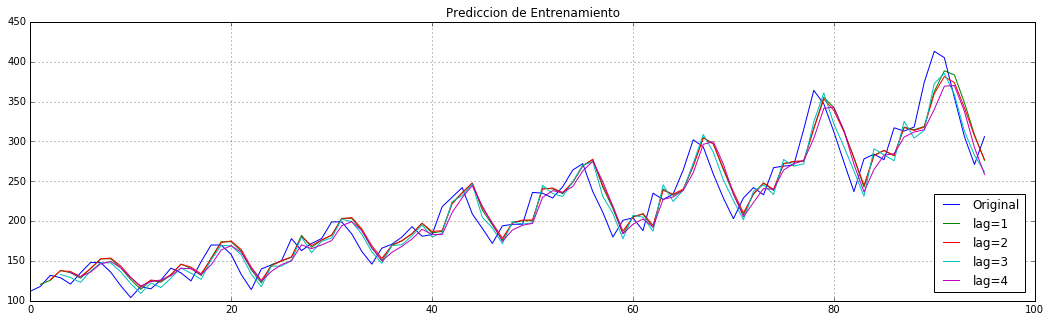

In [137]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Entrenamiento")
plt.plot(range(df_train.shape[0]),df_train[:,0],label="Original")
for lag in range(1,5):
    plt.plot(range(df_train.shape[0])[lag:],trPs[lag-1][:,0],label="lag="+str(lag))
plt.grid()
plt.legend(loc=(0.9,0.03))

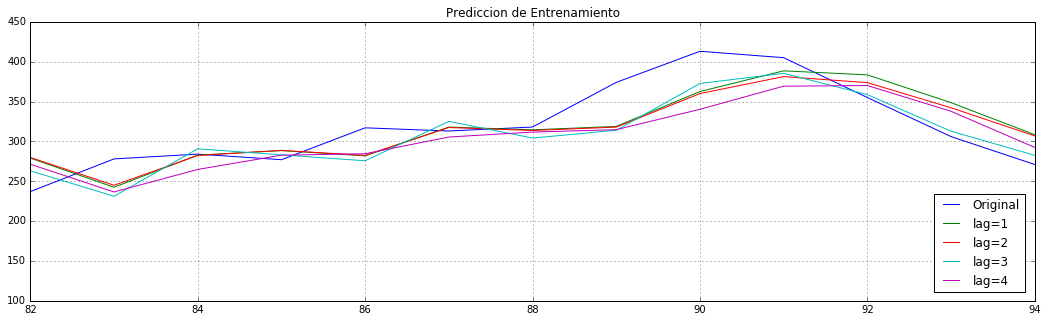

In [138]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Entrenamiento")
plt.plot(range(df_train.shape[0]),df_train[:,0],label="Original")
for lag in range(1,5):
    plt.plot(range(df_test.shape[0])[lag:],trPs[lag-1][:,0],label="lag="+str(lag))
plt.xlim(82,94)
plt.grid()
plt.xlim(37,46)
plt.legend(loc=(0.9,0.03))

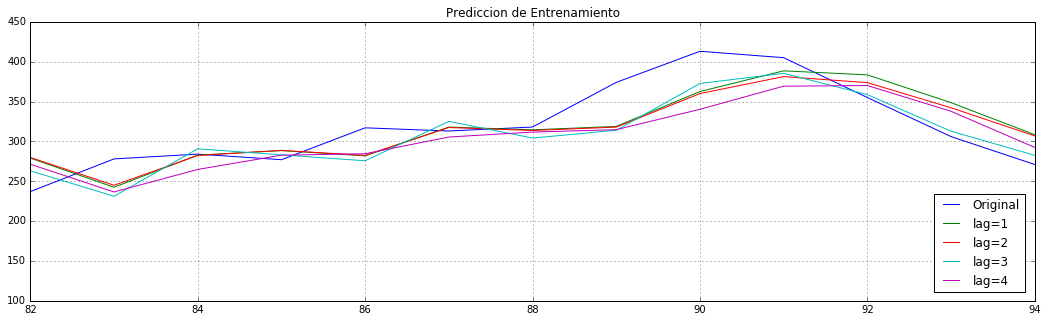

In [140]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Entrenamiento")
plt.plot(range(df_train.shape[0]),df_train[:,0],label="Original")
for lag in range(1,5):
    plt.plot(range(df_train.shape[0])[lag:],trPs[lag-1][:,0],label="lag="+str(lag))
plt.xlim(82,94)
plt.grid()
plt.legend(loc=(0.9,0.03))

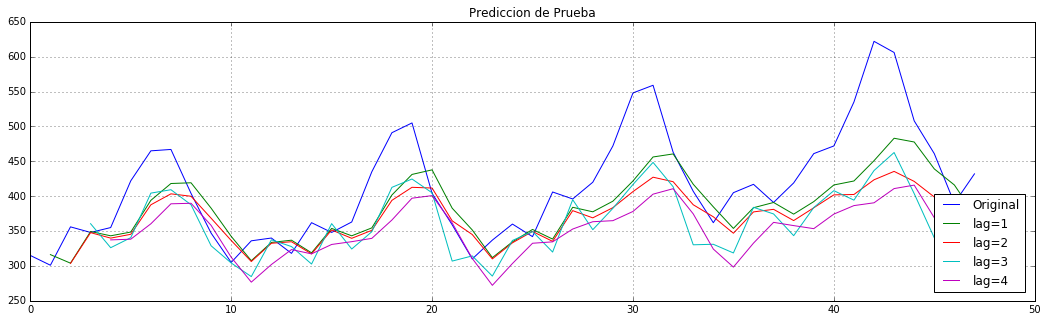

In [141]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Prueba")
plt.plot(range(df_test.shape[0]),df_test[:,0],label="Original")
for lag in range(1,5):
    plt.plot(range(df_test.shape[0])[lag:],tePs[lag-1][:,0],label="lag="+str(lag))
plt.grid()
plt.legend(loc=(0.9,0.03))

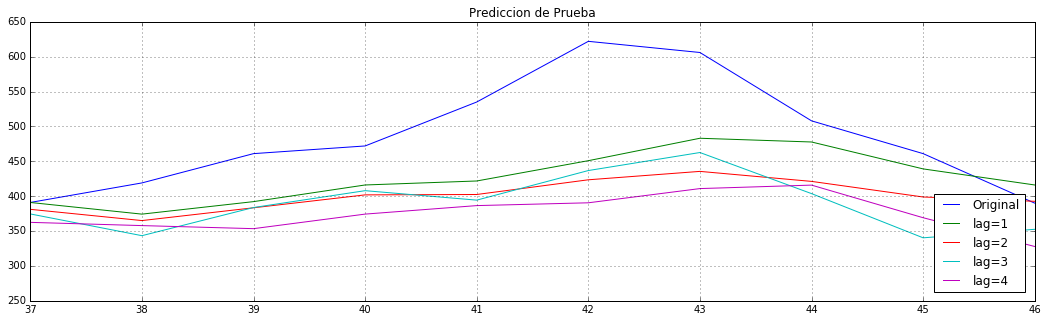

In [142]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Prueba")
plt.plot(range(df_test.shape[0]),df_test[:,0],label="Original")
for lag in range(1,5):
    plt.plot(range(df_test.shape[0])[lag:],tePs[lag-1][:,0],label="lag="+str(lag))
plt.xlim(37,46)
plt.grid()
plt.legend(loc=(0.9,0.03))

<div id='j'/>
## Parte (j)

A continuación se compara el desempeño de la red LSTM con el de una red recurrente simple y el de una GRU. Se aprecia que estas dos últimas presentan tiempos de entrenamiento mucho menores y sus resultados son aun mejores que los de la LSTM, por lo que son mucho más convenientes de utilizar (aunque no se debe descartar el hecho de que quizás una LSTM con otra configuración pueda presentar un mejor desempeño, en otras palabras, no se está diciendo que la LSTM es una red peor, sino solamente que en este escenario tuvo un peor comportamiento).

A modo de resumen, la red recurrente simple fue la más rápida, pero la GRU fue la que obtuvo mejores resultados.

In [ ]:
model = Sequential()
model.add(GRU(4, input_dim=lag, inner_init='orthogonal', activation='tanh'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=0)

In [ ]:
model = Sequential()
model.add(SimpleRNN(4, input_dim=lag, inner_init='orthogonal', activation='tanh'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=0)

In [168]:
times = []
trPs = []
tePs = []
trSs = []
teSs = []
names = ['LSTM','GRU','RNN']
lag = 3
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)
trainY = scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)
for n in names:
    t,trP,teP = load_file('j-'+str(n)+'.txt')
    times.append(float(t))
    trPs.append(trP)
    tePs.append(teP)
    print 'Tiempo de Entrenamiento ('+n+'): '+t
    trainScore = math.sqrt(mean_squared_error(trainY, trP[:,0]))
    print('Train Score ('+n+'): %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY, teP[:,0]))
    print('Test Score ('+n+'): %.2f RMSE' % (testScore))
    trSs.append(trainScore)
    teSs.append(testScore)

Tiempo de Entrenamiento (LSTM): 99.62646532058716
Train Score (LSTM): 23.22 RMSE
Test Score (LSTM): 77.94 RMSE
Tiempo de Entrenamiento (GRU): 28.40155816078186
Train Score (GRU): 22.33 RMSE
Test Score (GRU): 61.90 RMSE
Tiempo de Entrenamiento (RNN): 13.799294471740723
Train Score (RNN): 21.53 RMSE
Test Score (RNN): 66.10 RMSE


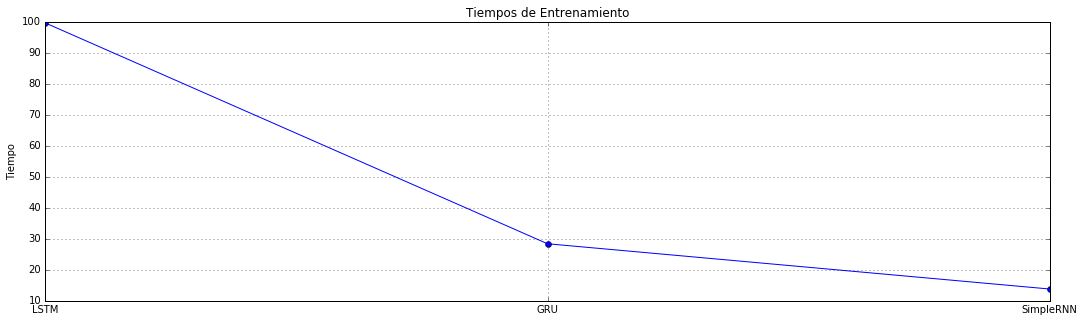

In [169]:
x = range(1,4)
ticks = ('LSTM','GRU','SimpleRNN')
plt.figure(figsize=(18,5))
plt.title("Tiempos de Entrenamiento")
plt.plot(x,times,'o-')
plt.ylabel("Tiempo")
plt.xticks(x,ticks)
plt.grid()

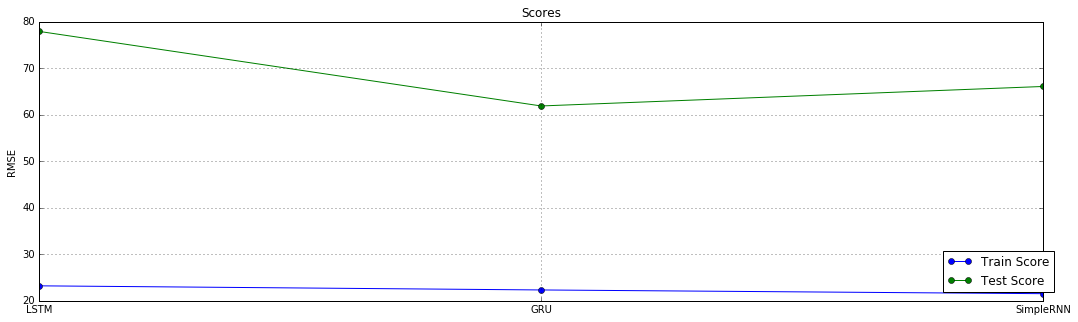

In [170]:
plt.figure(figsize=(18,5))
plt.title("Scores")
plt.plot(x,trSs,'o-',label="Train Score")
plt.plot(x,teSs,'o-',label="Test Score")
plt.ylabel("RMSE")
plt.xticks(x,ticks)
plt.grid()
plt.legend(loc=(0.9,0.03))

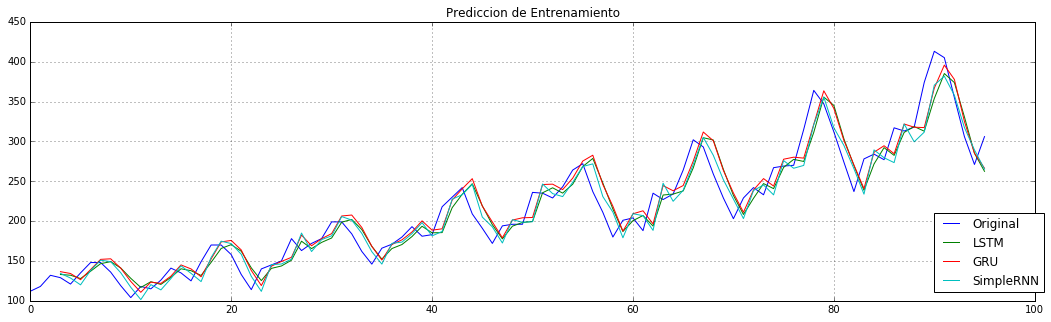

In [155]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Entrenamiento")
plt.plot(range(df_train.shape[0]),df_train[:,0],label="Original")
for i in x:
    plt.plot(range(df_train.shape[0])[lag:],trPs[i-1][:,0],label=ticks[i-1])
plt.grid()
plt.legend(loc=(0.9,0.03))

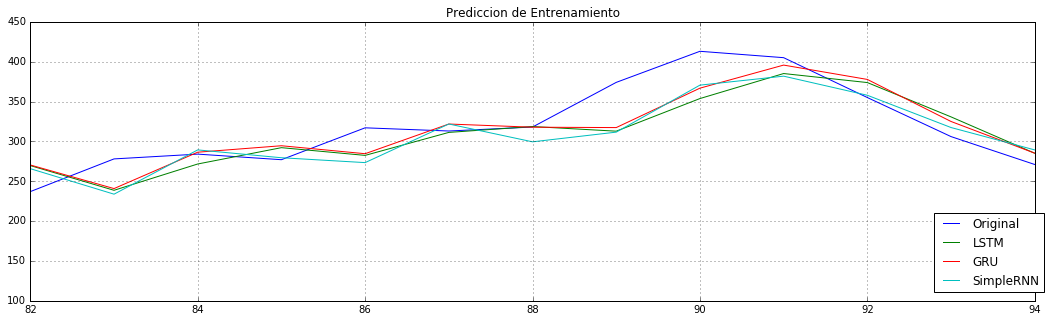

In [156]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Entrenamiento")
plt.plot(range(df_train.shape[0]),df_train[:,0],label="Original")
for i in x:
    plt.plot(range(df_train.shape[0])[lag:],trPs[i-1][:,0],label=ticks[i-1])
plt.xlim(82,94)
plt.grid()
plt.legend(loc=(0.9,0.03))

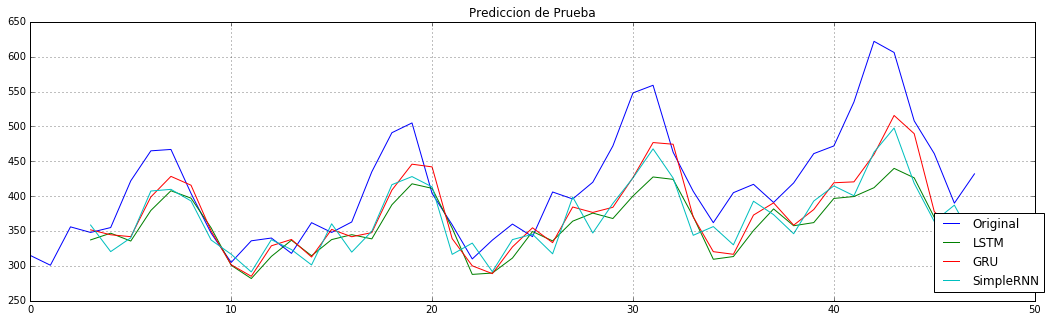

In [157]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Prueba")
plt.plot(range(df_test.shape[0]),df_test[:,0],label="Original")
for i in x:
    plt.plot(range(df_test.shape[0])[lag:],tePs[i-1][:,0],label=ticks[i-1])
plt.grid()
plt.legend(loc=(0.9,0.03))

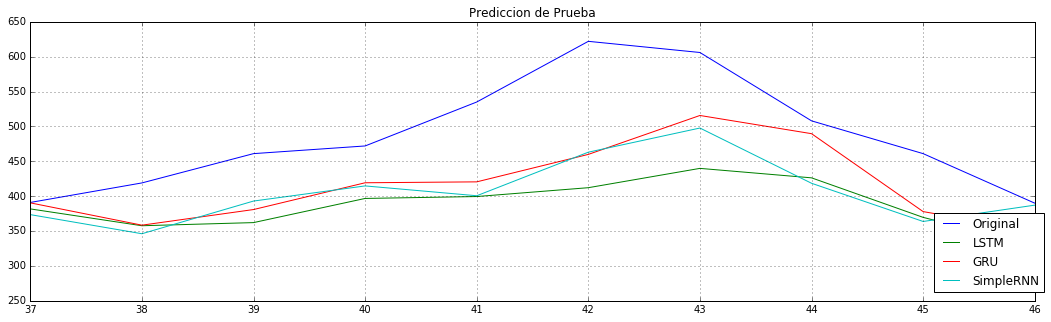

In [158]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Prueba")
plt.plot(range(df_test.shape[0]),df_test[:,0],label="Original")
for i in x:
    plt.plot(range(df_test.shape[0])[lag:],tePs[i-1][:,0],label=ticks[i-1])
plt.xlim(37,46)
plt.grid()
plt.legend(loc=(0.9,0.03))

<div id='k1'/>
## Parte (k)

Se pasa a utilizar un lag = 1 con timestep = 3. Si bien el tiempo de entrenamiento aumenta en aproximadamente un 37%, el error de prueba disminuye en un 11%, por lo que, debido a que los tiempos de entrenamiento de este experimento son pequeños, vale la pena pagar el precio. Quizás en experimentos más grandes se deba analizar este tipo de trade-off.

In [ ]:
lag = 1
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

model = Sequential()
model.add(LSTM(4, input_dim=lag, activation='tanh', inner_activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=0)

In [177]:
lag = 1
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)
trainY = scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)

trainXg, trainYg = create_dataset(stream_train_scaled, 3)
testXg, testYg = create_dataset(stream_test_scaled, 3)
trainYg = scaler.inverse_transform(trainYg)
testYg = scaler.inverse_transform(testYg)

tg,trPg,tePg = load_file('g.txt')
t,trP,teP = load_file('k.txt')
print 'Tiempo de Entrenamiento (lag=3 - ts=1): '+tg
trainScore = math.sqrt(mean_squared_error(trainYg, trPg[:,0]))
print('Train Score (lag=3 - ts=1): %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testYg, tePg[:,0]))
print('Test Score (lag=3 - ts=1): %.2f RMSE' % (testScore))
print 'Tiempo de Entrenamiento (lag=1 - ts=3): '+t
trainScore = math.sqrt(mean_squared_error(trainY, trP[:,0]))
print('Train Score (lag=1 - ts=3): %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, teP[:,0]))
print('Test Score (lag=1 - ts=3): %.2f RMSE' % (testScore))

Tiempo de Entrenamiento (lag=3 - ts=1): 50.84875464439392
Train Score (lag=3 - ts=1): 22.78 RMSE
Test Score (lag=3 - ts=1): 71.72 RMSE
Tiempo de Entrenamiento (lag=1 - ts=3): 69.44837236404419
Train Score (lag=1 - ts=3): 22.79 RMSE
Test Score (lag=1 - ts=3): 63.76 RMSE


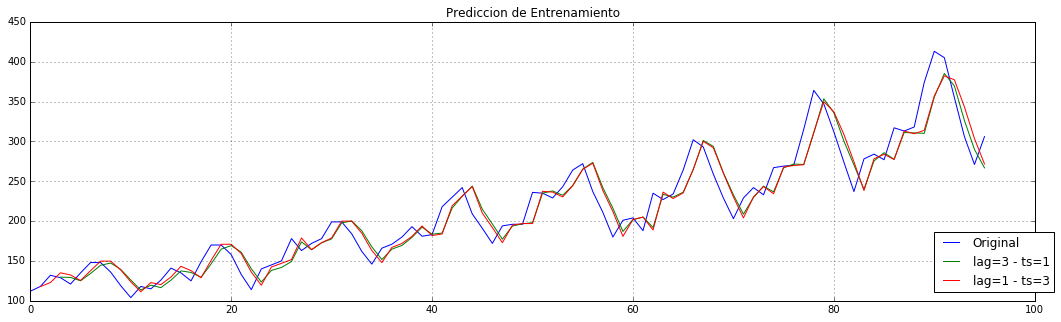

In [174]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Entrenamiento")
plt.plot(range(df_train.shape[0]),df_train[:,0],label="Original")
plt.plot(range(df_train.shape[0])[3:],trPg[:,0],label="lag=3 - ts=1")
plt.plot(range(df_train.shape[0])[1:],trP[:,0],label="lag=1 - ts=3")
plt.grid()
plt.legend(loc=(0.9,0.03))

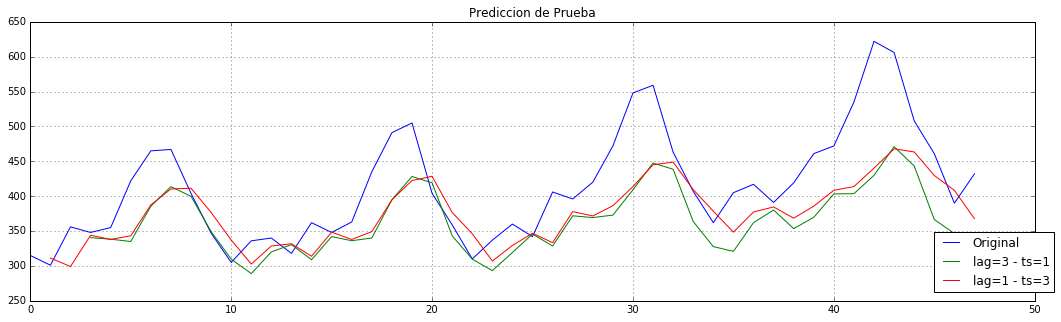

In [176]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Prueba")
plt.plot(range(df_test.shape[0]),df_test[:,0],label="Original")
plt.plot(range(df_test.shape[0])[3:],tePg[:,0],label="lag=3 - ts=1")
plt.plot(range(df_test.shape[0])[1:],teP[:,0],label="lag=1 - ts=3")
plt.grid()
plt.legend(loc=(0.9,0.03))

<div id='k2'/>
## Parte (k)

A continuación se entrena un red LSTM con memoria entre batches.

In [ ]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, lag, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=0, shuffle=False)
    model.reset_states()

In [179]:
lag = 3
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)
trainY = scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)

t,trP,teP = load_file('k2.txt')
print 'Tiempo de Entrenamiento: '+t
trainScore = math.sqrt(mean_squared_error(trainY, trP[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, teP[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Tiempo de Entrenamiento: 111.62714719772339
Train Score: 24.64 RMSE
Test Score: 81.35 RMSE


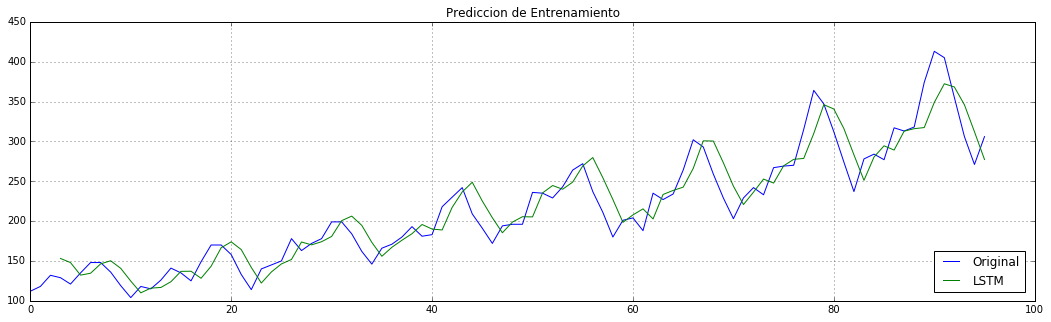

In [180]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Entrenamiento")
plt.plot(range(df_train.shape[0]),df_train[:,0],label="Original")
plt.plot(range(df_train.shape[0])[3:],trP[:,0],label="LSTM")
plt.grid()
plt.legend(loc=(0.9,0.03))

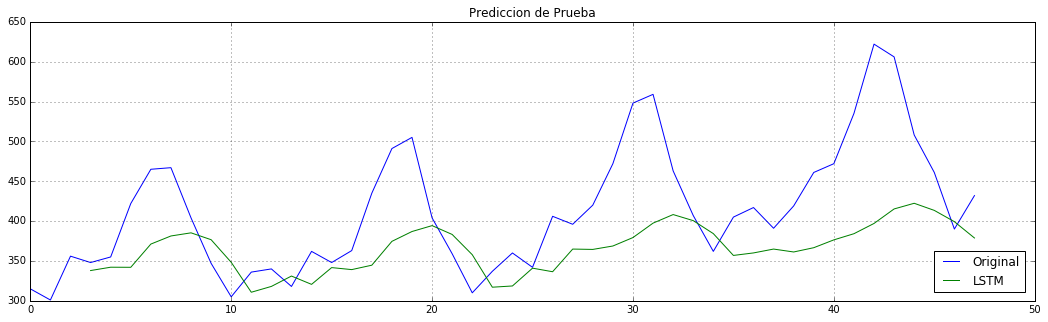

In [181]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Prueba")
plt.plot(range(df_test.shape[0]),df_test[:,0],label="Original")
plt.plot(range(df_test.shape[0])[3:],teP[:,0],label="LSTM")
plt.grid()
plt.legend(loc=(0.9,0.03))

<div id='l'/>
## Parte (l)

Se aumenta el tamaño de batch a 3, observando un mucho mejor comportamiento (33% menos de error) y un entrenamiento mucho más rapido (aproximadamente un 20% menos tiempo).

In [ ]:
batch_size = 3
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, lag, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=0, shuffle=False)
    model.reset_states()

In [182]:
lag = 3
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)
trainY = scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)

tk,trPk,tePk = load_file('k2.txt')
t,trP,teP = load_file('l.txt')
print 'Tiempo de Entrenamiento (bs = 1): '+tk
trainScore = math.sqrt(mean_squared_error(trainY, trPk[:,0]))
print('Train Score (bs = 1): %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, tePk[:,0]))
print('Test Score (bs = 1): %.2f RMSE' % (testScore))
print 'Tiempo de Entrenamiento (bs = 3): '+t
trainScore = math.sqrt(mean_squared_error(trainY, trP[:,0]))
print('Train Score (bs = 3): %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, teP[:,0]))
print('Test Score (bs = 3): %.2f RMSE' % (testScore))

Tiempo de Entrenamiento (bs = 1): 111.62714719772339
Train Score (bs = 1): 24.64 RMSE
Test Score (bs = 1): 81.35 RMSE
Tiempo de Entrenamiento (bs = 3): 89.54531240463257
Train Score (bs = 3): 23.13 RMSE
Test Score (bs = 3): 54.00 RMSE


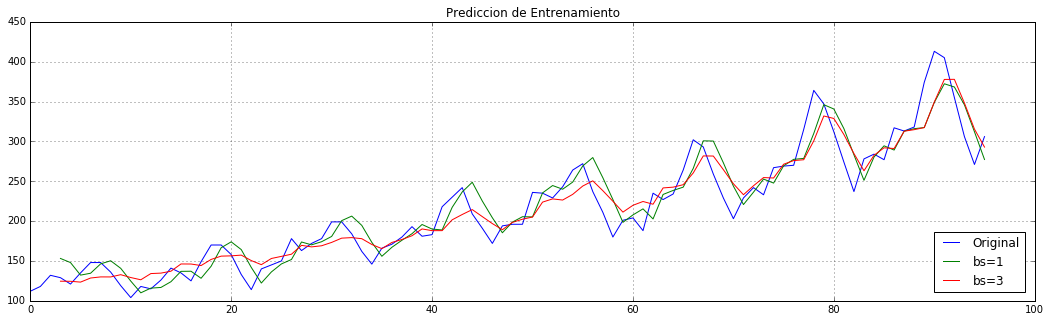

In [184]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Entrenamiento")
plt.plot(range(df_train.shape[0]),df_train[:,0],label="Original")
plt.plot(range(df_train.shape[0])[lag:],trPk[:,0],label="bs=1")
plt.plot(range(df_train.shape[0])[lag:],trP[:,0],label="bs=3")
plt.grid()
plt.legend(loc=(0.9,0.03))

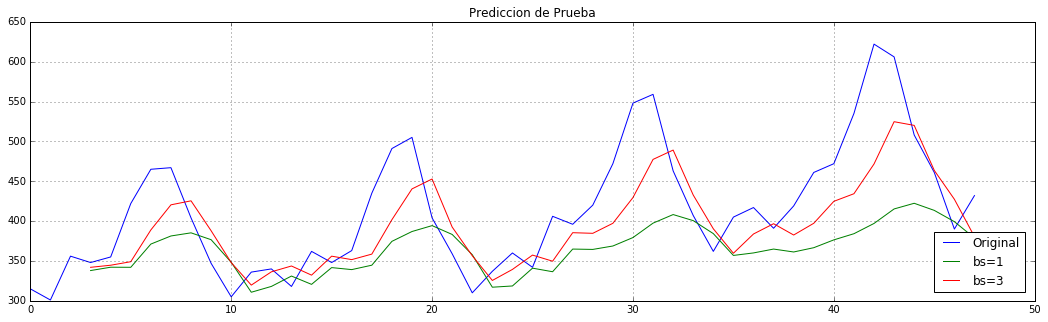

In [185]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Prueba")
plt.plot(range(df_test.shape[0]),df_test[:,0],label="Original")
plt.plot(range(df_test.shape[0])[lag:],tePk[:,0],label="bs=1")
plt.plot(range(df_test.shape[0])[lag:],teP[:,0],label="bs=3")
plt.grid()
plt.legend(loc=(0.9,0.03))

<div id='m'/>
## Parte (m)

Se entrena una red LSTM apilada y se compara con la obtenida anteriormente (ambas con tamaño de batch igual a 1). Se aprecia menos error en la LSTM normal (no apilada) y también un tiempo de entrenamiento menor, siendo más conveniente en ambos aspectos de comparación.

In [ ]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, lag, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, lag, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=0, shuffle=False)

In [186]:
lag = 3
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)
trainY = scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)

tk,trPk,tePk = load_file('k2.txt')
t,trP,teP = load_file('m.txt')
print 'Tiempo de Entrenamiento: '+tk
trainScore = math.sqrt(mean_squared_error(trainY, trPk[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, tePk[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
print 'Tiempo de Entrenamiento (Apilada): '+t
trainScore = math.sqrt(mean_squared_error(trainY, trP[:,0]))
print('Train Score (Apilada): %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, teP[:,0]))
print('Test Score (Apilada): %.2f RMSE' % (testScore))

Tiempo de Entrenamiento: 111.62714719772339
Train Score: 24.64 RMSE
Test Score: 81.35 RMSE
Tiempo de Entrenamiento (Apilada): 195.03040838241577
Train Score (Apilada): 20.23 RMSE
Test Score (Apilada): 88.96 RMSE


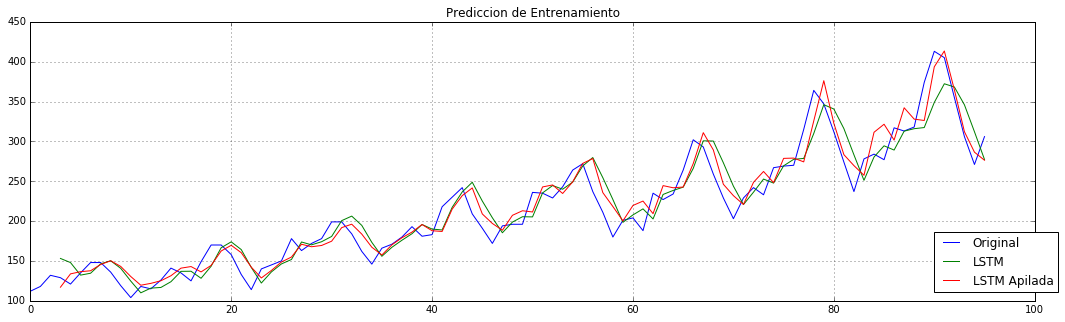

In [187]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Entrenamiento")
plt.plot(range(df_train.shape[0]),df_train[:,0],label="Original")
plt.plot(range(df_train.shape[0])[lag:],trPk[:,0],label="LSTM")
plt.plot(range(df_train.shape[0])[lag:],trP[:,0],label="LSTM Apilada")
plt.grid()
plt.legend(loc=(0.9,0.03))

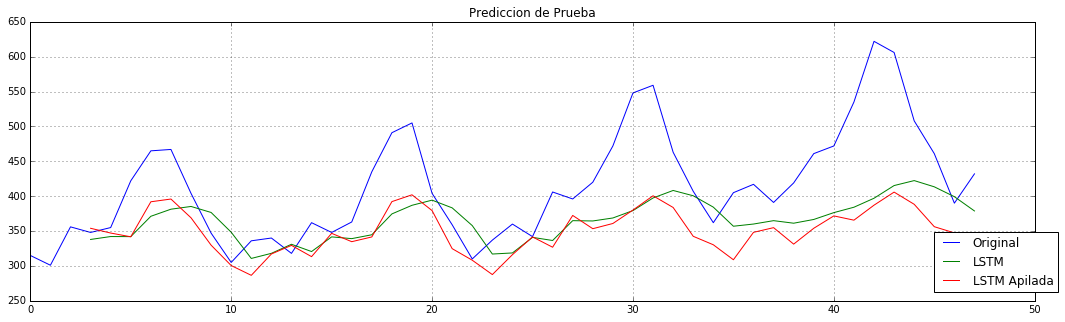

In [188]:
plt.figure(figsize=(18,5))
plt.title("Prediccion de Prueba")
plt.plot(range(df_test.shape[0]),df_test[:,0],label="Original")
plt.plot(range(df_test.shape[0])[lag:],tePk[:,0],label="LSTM")
plt.plot(range(df_test.shape[0])[lag:],teP[:,0],label="LSTM Apilada")
plt.grid()
plt.legend(loc=(0.9,0.03))